<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**Title:** To find out if rainy seasons has a correlation with the number of flu cases in Singapore

Flu seasons are commonly quoted in countries with a high variation of weather and seasonality. The aim of the study is to find out if Singapore's weather has a huge swing, and whether it will affect the flu cases, using covid-19 cases as a proxy.

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

In [ ]:
## find the sources of flu vs 

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code: 
def calculate_mean(array):
    return sum(array)/len(array)

In [3]:
calculate_mean([47,56,3,10])

29.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [315]:
# Code:

# def calculate_mean(array):
#     return sum(array)/len(array)

def calculate_sd(array):
    total = 0
    for i in array:
        diff = (i - calculate_mean(array))
        total += (diff**2)
    return (total / len(array))**(0.5)

In [316]:
calculate_sd([47,56,3,10])

22.85825890132492

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
# import all files here
dhr_df = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv')
mtr_df = pd.read_csv('../data/rainfall-monthly-total.csv')
nor_df = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
temp_df = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv')
humid_df = pd.read_csv('../data/relative-humidity-monthly-mean.csv')
flu_df = pd.read_csv('../data/epidemic-curve.csv')

#### For each of the dataset, find out the data types, number of columns and rows, and whether it has any null values
1. .info() for data types and number of rows
2. .tail() to find out the last available data. 
    * this can help in determining merging later
3. .isnull().mean() to find out proportion of null values, if any
    * if proportion is low, I will consider dropping the rows

#### Observations on dataset:
1. The datasets do not have any null values
2. There is a need to fix datetime across all the tables
    * we will merge them, and fix it together
3. Datatype for date column is listed as objects
    * we will convert them to datetime format, before transforming them into Year and Month
    * then, we will bin them into decades and seasons
4. The 'limiting factor' would be the dataset with the shortest number of rows (till Aug 2022)
    * this will determine how we merge the data later


In [412]:
dhr_df.info() # 490 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      490 non-null    object 
 1   maximum_rainfall_in_a_day  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [415]:
dhr_df.tail() # till Oct 2022

,month,maximum_rainfall_in_a_day
485,2022-06,59.4
486,2022-07,27.8
487,2022-08,32.4
488,2022-09,38.2
489,2022-10,38.8


In [414]:
dhr_df.isnull().mean()

month                        0.0
maximum_rainfall_in_a_day    0.0
dtype: float64

In [72]:
mtr_df.info() # 488 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [416]:
mtr_df.tail() # till Aug 2022

,month,total_rainfall
483,2022-04,239.6
484,2022-05,102.0
485,2022-06,211.8
486,2022-07,145.2
487,2022-08,141.4


In [126]:
mtr_df.isnull().mean()

month             0.0
total_rainfall    0.0
dtype: float64

In [417]:
nor_df.info() # 488 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [419]:
nor_df.tail() # till Aug 2022

,month,no_of_rainy_days
483,2022-04,18
484,2022-05,12
485,2022-06,17
486,2022-07,16
487,2022-08,15


In [420]:
nor_df.isnull().mean()

month               0.0
no_of_rainy_days    0.0
dtype: float64

In [422]:
temp_df.info() # 491 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      491 non-null    object 
 1   mean_temp  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [423]:
temp_df.tail() # till Nov 2022

,month,mean_temp
486,2022-07,28.6
487,2022-08,28.1
488,2022-09,27.9
489,2022-10,27.6
490,2022-11,27.4


In [424]:
temp_df.isnull().mean()

month        0.0
mean_temp    0.0
dtype: float64

In [425]:
humid_df.info() # 490 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    490 non-null    object 
 1   mean_rh  490 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [426]:
humid_df.tail() # till Oct 2022

,month,mean_rh
485,2022-06,79.1
486,2022-07,76.8
487,2022-08,77.4
488,2022-09,76.9
489,2022-10,78.7


In [427]:
humid_df.isnull().mean()

month      0.0
mean_rh    0.0
dtype: float64

In [65]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2106 non-null   object
 1   type    2106 non-null   object
 2   value   2106 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 49.5+ KB


In [66]:
flu_df.isnull().mean()

date     0.0
type     0.0
value    0.0
dtype: float64

In [6]:
flu_df.head() # find out its starting date and pattern

,date,type,value
0,2020-01-23,Imported,1
1,2020-01-23,Local,0
2,2020-01-24,Imported,2
3,2020-01-24,Local,0
4,2020-01-25,Imported,1


#### Merge data to fix datetime to create merged_df dataframe 
1. Merge the datasets
2. Fix datetime into year and month respectively
1. Group into different seasons, adapted from [weather.gov.sg](http://www.weather.gov.sg/climate-climate-of-singapore/)
    * Northeast Monsoon Season (December-Feb) - typically rain more, and becomes dryer towards the end
    * Inter-monsoon Period (March-May)
    * Southwest Monsoon Season (June-September) - typically dryer
    * Inter-monsoon Period (October - November)
2. Group into decades
    * 1982 - 1991 (80s)
    * 1992 - 2001 (90s)
    * 2002 - 2021 (10s)
    * 2022 - now (20s)

In [8]:
# use mtr_df as the limiting factor, so the last row of entry for merged_df is Aug 2022
merged_df = mtr_df.merge(nor_df,on=['month']).merge(dhr_df,on=['month']).merge(temp_df, on=['month']).merge(humid_df, on=['month'])

In [9]:
# convert to datetime format
merged_df['date']=pd.to_datetime(merged_df['month'])

# split into year and month
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month

In [10]:
# group months into into monsoon seasons

def monsoon_status(merged_df):
    if merged_df['month'] == 12 or merged_df['month'] == 1 or merged_df['month'] == 2:
        return 'Northeast Monsoon (Dec-Feb)'
    elif merged_df['month'] == 6 or merged_df['month'] == 7 or merged_df['month'] == 8 or merged_df['month']== 9:
        return 'Southwest Monsoon (Jun-Sept)'
    elif merged_df['month'] == 10 or merged_df['month'] == 11:
        return 'Inter-monsoon (Oct - Nov)'
    else:
        return 'Inter-monsoon (Mar-May)'

merged_df['season'] = merged_df.apply(monsoon_status, axis = 1)

In [11]:
# group years into decades

def decade(merged_df):
    if merged_df['year'] < 1990:
        return '80s'
    elif merged_df['year'] >= 1990 and merged_df['year'] < 2000:
        return '90s'
    elif merged_df['year'] >= 2000 and merged_df['year'] < 2010:
        return '00s'
    elif merged_df['year'] >= 2010 and merged_df['year'] < 2020:
        return '10s'
    else:
        return '20s'

merged_df['decade'] = merged_df.apply(decade, axis = 1)

In [8]:
merged_df.head()

,month,total_rainfall,no_of_rainy_days,maximum_rainfall_in_a_day,mean_temp,mean_rh,date,year,season,decade
0,1,107.1,10,36.5,25.9,81.2,1982-01-01,1982,Northeast Monsoon (Dec-Feb),80s
1,2,27.8,5,9.4,27.1,79.5,1982-02-01,1982,Northeast Monsoon (Dec-Feb),80s
2,3,160.8,11,61.7,27.2,82.3,1982-03-01,1982,Inter-monsoon (Mar-May),80s
3,4,157.0,14,45.1,27.0,85.9,1982-04-01,1982,Inter-monsoon (Mar-May),80s
4,5,102.2,10,33.0,28.0,83.2,1982-05-01,1982,Inter-monsoon (Mar-May),80s


#### Rename and rearrange 
1. Rename long table names
2. Rearrange columns for easy analysis

In [12]:
# rename the columns
new_columns_dict = {
    'maximum_rainfall_in_a_day': 'daily_max_rainfall',
    'no_of_rainy_days': 'rainy_days',
}

# assign new column names
merged_df.rename(columns = new_columns_dict, inplace=True) 

In [13]:
merged_df_columns = ['date', 'year', 'month', 'decade', 'season', 'total_rainfall', 'rainy_days', 'daily_max_rainfall', 
                     'mean_temp', 'mean_rh',]

merged_df = merged_df[merged_df_columns]

In [11]:
# export the merged_df dataframe into a .csv file
merged_df.to_csv('../data/merged_data.csv')

#### Create merged_flu_df for further analysis
1. Create a pivot to have local and imported numbers column
2. Create a column to add up local and imported numbers
3. Convert date to datetime format in order to group the total numbers into months
4. Merge this dataframe with merged_df, which has more data on the weather

In [14]:
# do a pivot with local and imported numbers
columns = ['Local','Imported']
flu_df = flu_df.pivot(index="date", columns='type', values="value").reset_index()

In [15]:
# create a new column of total_cases
flu_df['total_cases'] = [x + y for x, y in zip(flu_df['Imported'], flu_df['Local'])]

In [16]:
# flatten the df
flu_df = flu_df.groupby(['date']).agg([np.sum])
flu_df.columns = flu_df.columns.map(' '.join)
flu_df = flu_df.reset_index()

In [17]:
# convert date to datetime format
flu_df['date']=pd.to_datetime(flu_df['date'])
flu_df.set_index('date', inplace=True)

In [18]:
# group the data in monthly format
flu_df = flu_df.resample('MS').sum()

In [19]:
# flatten the df
flu_df.columns = flu_df.columns.map(''.join)
flu_df = flu_df.reset_index()

In [73]:
flu_df.head()

,date,Imported sum,Local sum,total_cases sum
0,2020-01-01,16,0,16
1,2020-02-01,8,78,86
2,2020-03-01,489,335,824
3,2020-04-01,66,15166,15232
4,2020-05-01,1,18709,18710


In [20]:
# merge two dataframes 
merged_flu_df = flu_df.merge(merged_df,on=['date'])

In [21]:
# rename the columns
new_columns_dict = {
    'Imported sum': 'imported_cases',
    'Local sum': 'local_cases',
    'total_cases sum': 'total_cases'
}

# assign new column names
merged_flu_df.rename(columns = new_columns_dict, inplace=True) 

In [22]:
# rearrange the columns
merged_flu_df_columns = ['date', 'year', 'month', 'decade', 'season', 'total_rainfall', 'rainy_days', 'daily_max_rainfall', 
                     'mean_temp', 'mean_rh', 'imported_cases', 'local_cases', 'total_cases']

merged_flu_df = merged_flu_df[merged_flu_df_columns]

In [94]:
merged_flu_df.tail()

,date,year,month,decade,season,total_rainfall,rainy_days,daily_max_rainfall,mean_temp,mean_rh,imported_cases,local_cases,total_cases
27,2022-04-01,2022,4,20s,Inter-monsoon (Mar-May),239.6,18,58.8,28.1,80.0,2817,98663,101480
28,2022-05-01,2022,5,20s,Inter-monsoon (Mar-May),102.0,12,44.6,29.2,76.5,3684,101702,105386
29,2022-06-01,2022,6,20s,Southwest Monsoon (Jun-Sept),211.8,17,59.4,27.9,79.1,10587,130187,140774
30,2022-07-01,2022,7,20s,Southwest Monsoon (Jun-Sept),145.2,16,27.8,28.6,76.8,11808,258180,269988
31,2022-08-01,2022,8,20s,Southwest Monsoon (Jun-Sept),141.4,15,32.4,28.1,77.4,6378,118810,125188


In [91]:
# export the merged_flu_df dataframe into a .csv file
merged_flu_df.to_csv('../data/merged_flu_data.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

All datasets were obtained from [data.gov.sg](https://data.gov.sg). 
1. [total amount of rainfall of the month](https://data.gov.sg/dataset/rainfall-monthly-total)
2. [monthly maximum daily total rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
3. [number of rainy days](https://data.gov.sg/dataset/rainfall-monthly-number-of-rain-days)
4. [monthly mean temp](https://data.gov.sg/dataset/surface-air-temperature-monthly-mean)
5. [monthly relative humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
6. [epidemic curve](https://data.gov.sg/dataset/covid-19-case-numbers)

|Feature|Type|Dataset|Description|
|---|---|---|---|
|date|datetime|all datasets|Jan 1982 - Aug 2022 (datasets #1 & #3), Jan 1982 - Oct 2022 (datasets #2 & #5), Jan 1982 - Nov 2022 (dataset #4)
|year|integer|all datasets|1982 - 2022
|month|integer|all datasets|Jan - Dec, represented by 01 - 12 respectively
|decade|obj|merged_df|80s to 2020s
|season|obj|merged_df|Northeast Monsoon (Dec-Feb), Southwest Monsoon (Jun-Sept), Inter-monsoon (Oct-Nov), Inter-monsoon (May-Mar)
|total rainfall|float|rainfall-monthly-total|the total monthly rainfall, recorded in millimetre| 
|maximum daily rainfall|float|rainfall-monthly-highest-daily-total|the highest daily total rainfall for the month in millimetre| 
|number of rainy days|int|rainfall-monthly-number-of-rain-days|the number of rain days (day with rainfall amount of 0.2mm or more) in a month| 
|mean daily surface air temperature|float|relative-humidity-monthly-mean|in Degree Celsius|
|monthly relative humidity|float|relative_humidity-monthly-mean|Percentages, expressed as a value over 100. It represents the ratio of how much water vapour is in the air and how much water vapour the air could potentially contain at a given temperature.|
|imported Covid cases|int|epidemic-curve|Number of cases in a month|
|local Covid cases|int|epidemic-curve|Number of cases in a month, this number will be used in most of the analysis|
|total Covid cases|int|epidemic-curve|Number of cases in a month|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [23]:
# Q1: A quick summary statistics of the dataset for temperature and flu cases
merged_flu_df.describe()

,year,month,total_rainfall,rainy_days,daily_max_rainfall,mean_temp,mean_rh,imported_cases,local_cases,total_cases
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2020.875000,6.000000,186.693750,15.125000,50.137500,28.003125,78.284375,2020.062500,55456.312500,57476.375000
std,0.793116,3.369694,118.262638,5.046557,34.201431,0.644823,2.085141,3516.608052,99807.003034,102003.141646
min,2020.000000,1.000000,1.000000,2.000000,0.600000,26.000000,73.800000,1.000000,0.000000,16.000000
25%,2020.000000,3.000000,107.450000,12.000000,32.700000,27.600000,76.750000,162.000000,74.500000,705.000000
50%,2021.000000,6.000000,176.000000,15.500000,47.100000,28.100000,78.050000,296.500000,6281.500000,6442.000000
75%,2021.250000,8.250000,235.250000,18.250000,58.950000,28.500000,79.775000,1965.750000,74260.250000,80424.500000
max,2022.000000,12.000000,692.800000,24.000000,210.600000,29.200000,82.600000,12091.000000,367171.000000,372004.000000


Observation: imported_cases, local_cases, and total_cases has the highest standard deviation. total_rainfall also has a relatively large standard deviation.

In [25]:
cols = ['total_rainfall','rainy_days','daily_max_rainfall','mean_temp','mean_rh']

In [26]:
merged_df[cols]

,total_rainfall,rainy_days,daily_max_rainfall,mean_temp,mean_rh
0,107.1,10,36.5,25.9,81.2
1,27.8,5,9.4,27.1,79.5
2,160.8,11,61.7,27.2,82.3
3,157.0,14,45.1,27.0,85.9
4,102.2,10,33.0,28.0,83.2
...,...,...,...,...,...
483,239.6,18,58.8,28.1,80.0
484,102.0,12,44.6,29.2,76.5
485,211.8,17,59.4,27.9,79.1
486,145.2,16,27.8,28.6,76.8


In [28]:
# check - not solved yet
for cols in merged_df[merged_df.columns[cols]]:
    if type(cols) == 'float64' or type(cols) == 'int64':
        calculate_sd(cols) 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [458]:
# NOT SOLVED YET

# Q2: Use a dictionary comprehension to apply the standard deviation function you create in part 1 to each numeric column in the dataframe
# wrong code because col is a string

std_Dict = { k:v for (k,v) in zip(col, values)} 

TypeError: 'DataFrame' object cannot be interpreted as an integer

In [243]:
for col in merged_df.columns:
    print(type(col))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
# Q3(a): Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?

In [252]:
# find highest total rainfall in 1990, 2000, 2010, 2020
merged_df.groupby('year')['total_rainfall'].max()
'''
Answers:
1990 : 204.5mm
2000 : 385.7mm
2010 : 298.5mm
2020 : 255.6mm
'''

year
1982    494.1
1983    370.6
1984    470.4
1985    340.1
1986    396.0
1987    568.6
1988    440.4
1989    508.4
1990    204.5
1991    492.3
1992    502.7
1993    308.5
1994    425.4
1995    372.8
1996    300.0
1997    351.9
1998    463.4
1999    340.5
2000    385.7
2001    609.0
2002    307.2
2003    444.2
2004    600.9
2005    362.9
2006    765.9
2007    468.6
2008    327.3
2009    281.8
2010    298.5
2011    513.2
2012    363.4
2013    395.2
2014    250.8
2015    302.3
2016    292.6
2017    371.2
2018    287.0
2019    421.5
2020    255.6
2021    692.8
2022    239.6
Name: total_rainfall, dtype: float64

In [253]:
# find lowest total rainfall in 1990, 2000, 2010, 2020
merged_df.groupby('year')['total_rainfall'].min()
'''
Answers:
1990 : 24.1mm
2000 : 81.1mm
2010 : 23.0mm
2020 : 65.0mm
'''

year
1982     27.8
1983      5.6
1984    102.7
1985     37.0
1986     26.7
1987     22.6
1988     62.9
1989     52.4
1990     24.1
1991     37.3
1992     62.4
1993     61.7
1994     23.7
1995     29.5
1996    107.5
1997     15.4
1998     32.5
1999     67.4
2000     81.1
2001     86.6
2002     10.8
2003     50.3
2004     31.9
2005      8.4
2006     83.1
2007    105.5
2008     87.2
2009     21.8
2010      6.3
2011     23.0
2012     53.0
2013     85.8
2014      0.2
2015     18.8
2016      6.2
2017     79.6
2018     14.8
2019     11.8
2020     65.0
2021      1.0
2022     99.8
Name: total_rainfall, dtype: float64

In [271]:
# Q3(b): Which year have the highest total rainfall in the date range of analysis?
merged_df.nlargest(1, columns = 'total_rainfall')

# A: 2006 has the highest total rainfall, with a total of 765.9mm

,year,month,date,total_rainfall,rainy_days,max_rainfall
299,2006,12,2006-12-01,765.9,22,198.0


In [272]:
# Q3(b): Which year have the lowest total rainfall in the date range of analysis?
merged_df.nsmallest(1, columns = 'total_rainfall')

# A: 2014 has the lowest total rainfall, only a total of 0.2 mm

,year,month,date,total_rainfall,rainy_days,max_rainfall
385,2014,02,2014-02-01,0.2,1,0.2


**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

In [276]:
# Q4: Are there any outliers months in the dataset?

In [134]:
merged_df.describe()

,year,month,total_rainfall,rainy_days,daily_max_rainfall,mean_temp,mean_rh
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,2001.836066,6.467213,177.163730,14.061475,52.332172,27.678893,82.247541
std,11.752660,3.449095,113.916029,4.947394,35.746423,0.802195,3.413940
min,1982.000000,1.000000,0.200000,1.000000,0.200000,25.400000,72.000000
25%,1992.000000,3.000000,93.850000,11.000000,30.675000,27.100000,80.000000
50%,2002.000000,6.000000,159.450000,14.000000,43.900000,27.700000,82.650000
75%,2012.000000,9.000000,238.075000,18.000000,63.050000,28.300000,84.700000
max,2022.000000,12.000000,765.900000,27.000000,216.200000,29.500000,90.700000


<AxesSubplot: >

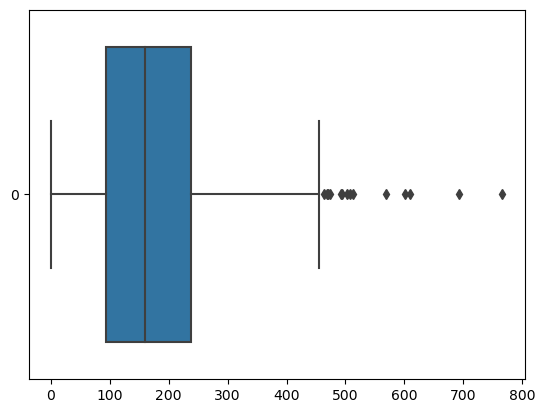

In [290]:
# preliminary exploration of outliers

sns.boxplot(merged_df['total_rainfall'], orient='h') 
# yes, there are some outliers above the upper bound. 

In [118]:
# calculate total_rainfall IQR
q1_total_rainfall = 93.85
q3_total_rainfall = 238.075
IQR_total_rainfall = q3_total_rainfall - q1_total_rainfall
print(f' IQR: {IQR_total_rainfall}')

# find the upper bound value 
right_quartile = q3_total_rainfall + (1.5*IQR_total_rainfall)
print(f' Upper bound: {right_quartile}')

 IQR: 144.225
 Upper bound: 454.41249999999997


In [308]:
# find out the outlier months of total_rainfall
merged_df.loc[merged_df['total_rainfall'] > 460]

# A: Most of the outliers of total_rainfall happened during the months of Dec and Jan. This is expected as the Northeast monsoon period has a higher rainfall than other periods.

,year,month,date,total_rainfall,rainy_days,max_rainfall
11,1982,12,1982-12-01,494.1,21,109.0
25,1984,02,1984-02-01,470.4,19,154.4
60,1987,01,1987-01-01,568.6,16,127.4
94,1989,11,1989-11-01,508.4,20,148.6
119,1991,12,1991-12-01,492.3,19,79.4
130,1992,11,1992-11-01,474.3,18,120.6
131,1992,12,1992-12-01,502.7,23,105.7
203,1998,12,1998-12-01,463.4,22,84.4
239,2001,12,2001-12-01,609.0,20,211.1
264,2004,01,2004-01-01,600.9,13,177.8


<AxesSubplot: >

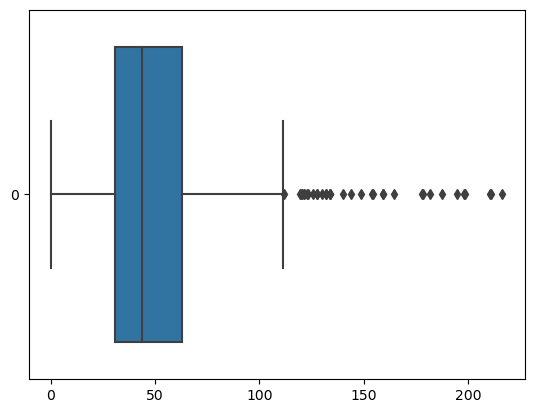

In [286]:
# find out if max_rainfall has outliers
sns.boxplot(merged_df['max_rainfall'], orient='h') 

In [121]:
# looks like max_rainfall has some outliers too - lets get the upper bound of max_rainfall to get the months
# calculate max_rainfall IQR
q1_max_rainfall = 30.675
q3_max_rainfall = 63.05

IQR_max_rainfall = q3_max_rainfall - q1_max_rainfall
print(f'IQR: {IQR_max_rainfall}')
      
# find the upper bound value 
right_quartile_max_rainfall = q3_max_rainfall + (1.5*IQR_max_rainfall)
print(f'Upper bound: {right_quartile_max_rainfall}')

IQR: 32.375
Upper bound: 111.6125


In [34]:
# find out the outlier months of max_rainfall
merged_df.loc[merged_df['daily_max_rainfall'] > 112].sort_values(by='daily_max_rainfall', ascending=False)

,date,year,month,decade,season,total_rainfall,rainy_days,daily_max_rainfall,mean_temp,mean_rh
348,2011-01-01,2011,1,10s,Northeast Monsoon (Dec-Feb),513.2,17,216.2,26.3,85.8
239,2001-12-01,2001,12,00s,Northeast Monsoon (Dec-Feb),609.0,20,211.1,26.7,86.8
468,2021-01-01,2021,1,20s,Northeast Monsoon (Dec-Feb),692.8,17,210.6,26.0,82.6
166,1995-11-01,1995,11,90s,Inter-monsoon (Oct - Nov),372.8,20,198.6,27.0,86.8
299,2006-12-01,2006,12,00s,Northeast Monsoon (Dec-Feb),765.9,22,198.0,26.6,88.5
252,2003-01-01,2003,1,00s,Northeast Monsoon (Dec-Feb),444.2,20,194.4,26.7,86.9
80,1988-09-01,1988,9,80s,Southwest Monsoon (Jun-Sept),440.4,14,187.3,27.1,84.5
19,1983-08-01,1983,8,80s,Southwest Monsoon (Jun-Sept),262.2,10,181.8,28.1,81.2
154,1994-11-01,1994,11,90s,Inter-monsoon (Oct - Nov),322.2,21,178.3,26.7,88.4
264,2004-01-01,2004,1,00s,Northeast Monsoon (Dec-Feb),600.9,13,177.8,26.9,86.7


Observation: Most of the months that has the highest daily rainfall happens during the Northeast monsoon period. In fact, among the top 5 outliers, 4 happened during the Northeast monsoon period

<AxesSubplot: >

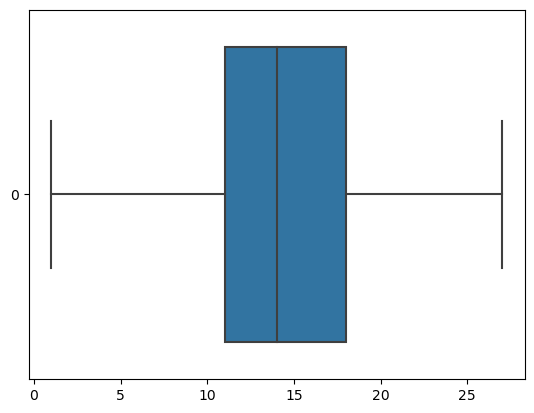

In [317]:
# find out if rainy_days has outliers
sns.boxplot(merged_df['rainy_days'], orient='h') 

Commentary: There is no outlier for the number of rainy days in a month

<AxesSubplot: >

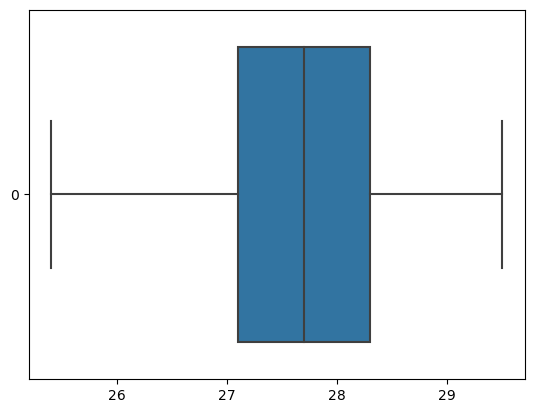

In [113]:
# find out if mean_temp has outliers
sns.boxplot(merged_df['mean_temp'], orient='h') 

Observation: There is no outlier for the mean temperature.

<AxesSubplot: >

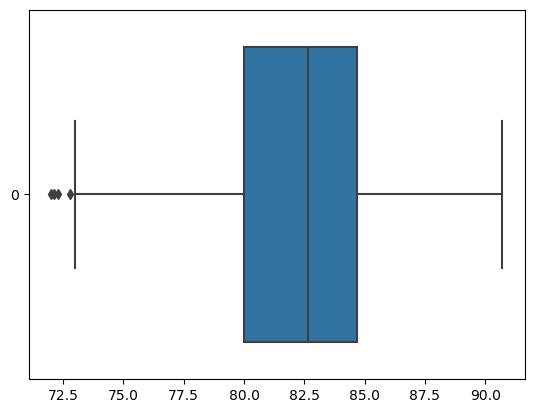

In [114]:
# find out if mean_temp has outliers
sns.boxplot(merged_df['mean_rh'], orient='h') 

In [135]:
# looks like mean_rh has some outliers, will get the lower bound
# calculate mean_rh IQR
q1_mean_rh = 80
q3_mean_rh = 84.7
IQR_mean_rh = q3_mean_rh - q1_mean_rh
print(f'IQR: {IQR_mean_rh}')
      
# find the lower bound value 
left_quartile_mean_rh = q1_mean_rh - (1.5*IQR_mean_rh)
print(f'Lower bound: {left_quartile_mean_rh}')

IQR: 4.700000000000003
Lower bound: 72.94999999999999


In [133]:
# find out the outlier months of max_rainfall
merged_df.loc[merged_df['mean_rh'] < 73]

,date,year,month,decade,season,total_rainfall,rainy_days,daily_max_rainfall,mean_temp,mean_rh
417,2016-10-01,2016,10,10s,Inter-monsoon (Oct - Nov),181.0,16,75.4,28.3,72.0
419,2016-12-01,2016,12,10s,Northeast Monsoon (Dec-Feb),292.6,23,73.0,27.4,72.8
446,2019-03-01,2019,3,10s,Inter-monsoon (Mar-May),72.2,6,29.0,28.7,72.3
451,2019-08-01,2019,8,10s,Southwest Monsoon (Jun-Sept),11.8,6,3.8,29.1,72.1


Observation: They are only a few days of lower relative humidity. A lower relative humidity means the days had a warmer temperature. This is because relative humidity is measured by the amount of water vapour that a given temperature can hold, and colder air can hold lesser water vapor. A hotter air can hold more water vapor, hence it brings down the relative humidity.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_9031/3631086635.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


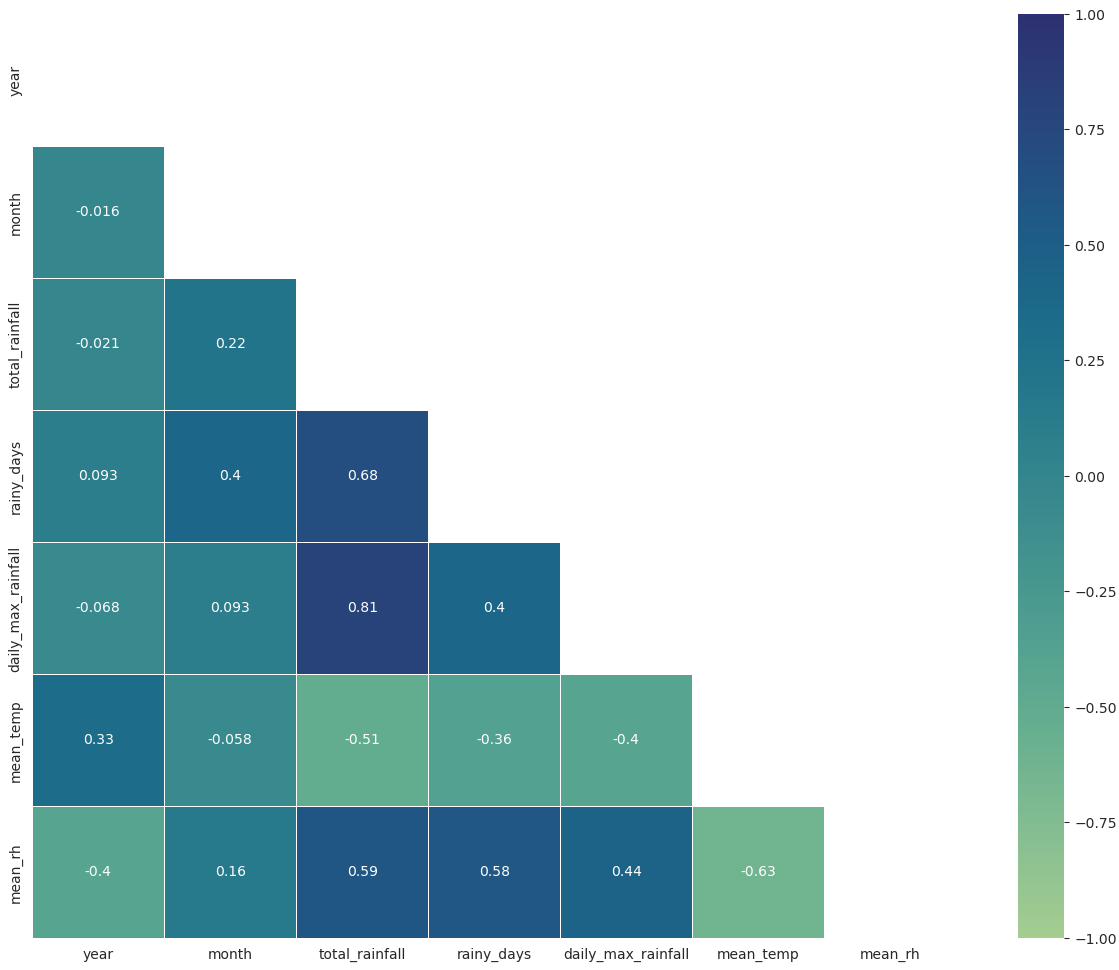

In [37]:
# find out corr between highest daily rainfall and max rainfall

plt.figure(figsize = (16,12))

# Get correlation of variables.
corr = merged_df.corr()

# Set up mask to be "True" in the upper triangle. this is to reduce the number of 'squares' seen in the correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='crest')

**Observation**: There is a positive correlation between total rainfall with number of rainy days, maximum rainfall, and mean relative humidity. 

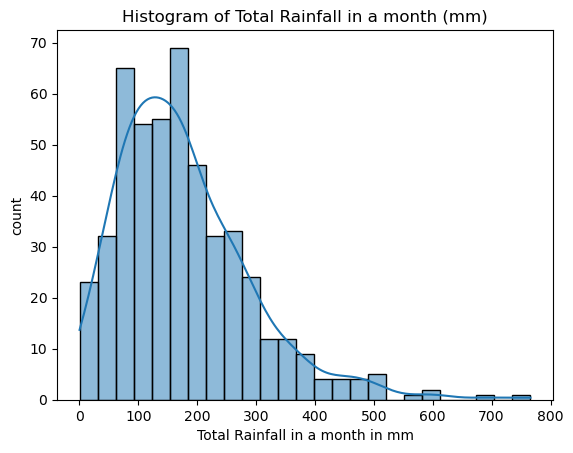

In [35]:
# histrogram of the total rainfall in mm
sns.histplot(merged_df['total_rainfall'], bins = 25, kde = True);
plt.xlabel('Total Rainfall in a month in mm')
plt.ylabel('count')
plt.title('Histogram of Total Rainfall in a month (mm)')
plt.show()

# A: Distribution of monthly total rainfall is skewed to the right

In [335]:
merged_df['total_rainfall'].mean() # mean is 177.16 mm

177.1637295081967

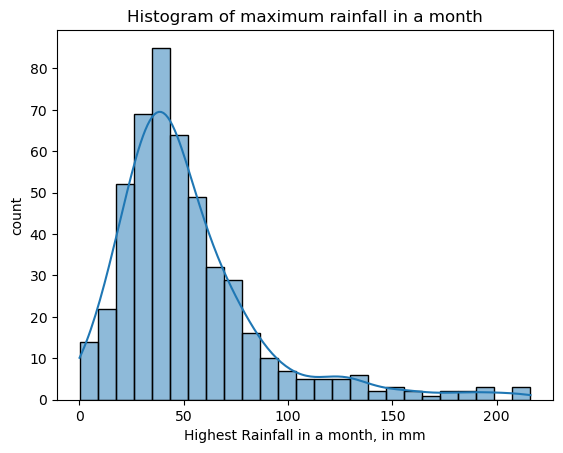

In [508]:
# histogram of highest daily rainfall in a month
sns.histplot(merged_df['daily_max_rainfall'], bins = 25, kde = True);
plt.xlabel('Highest Rainfall in a month, in mm')
plt.ylabel('count')
plt.title('Histogram of maximum rainfall in a month')
plt.show()

# A: Distribution of monthly total rainfall is skewed to the right

In [337]:
merged_df['max_rainfall'].mean() # mean amount of max rainfall is around 52mm per month

52.33217213114754

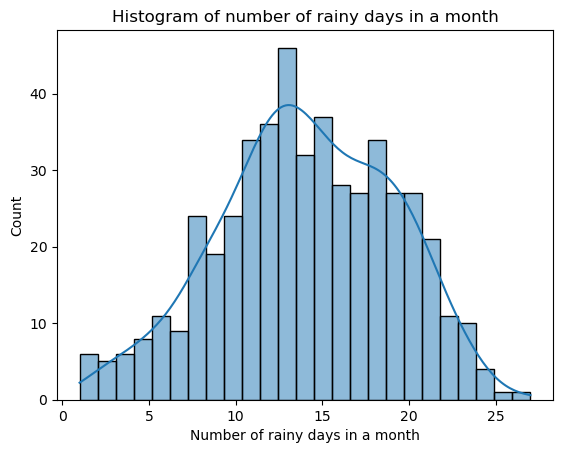

In [509]:
# histogram of number of rainy days in a month

sns.histplot(merged_df['rainy_days'], bins = 25, kde = True);
plt.xlabel('Number of rainy days in a month')
plt.ylabel('Count')
plt.title('Histogram of number of rainy days in a month')
plt.show()

# A: The distribution of number of rainy days looks like a normal distribution, with a slight skew to the left

In [36]:
merged_df['rainy_days'].mean() # mean number of rainy days in a month is 14

14.061475409836065

<AxesSubplot: xlabel='month'>

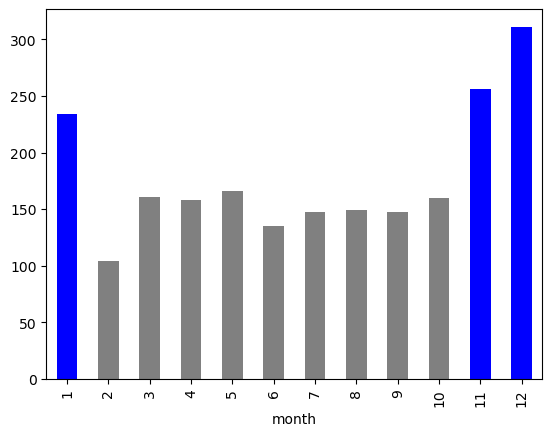

In [593]:
# rainfall by months to find seasonality
merged_df.groupby('month')['total_rainfall'].mean().plot(kind='bar',
                                                         color = ['blue','gray','gray','gray','gray','gray','gray','gray','gray','gray','blue','blue'])

<AxesSubplot: ylabel='season'>

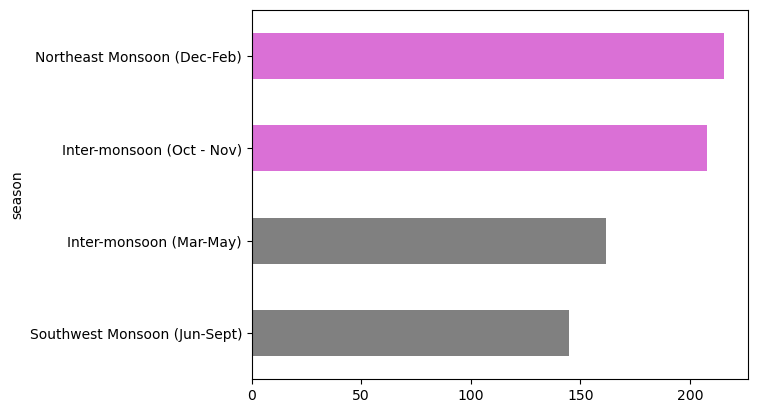

In [51]:
# study total rainfall by season
merged_df.groupby('season')['total_rainfall'].mean().sort_values(ascending=True).plot.barh(color=['grey','grey','orchid','orchid'])

<AxesSubplot: ylabel='decade'>

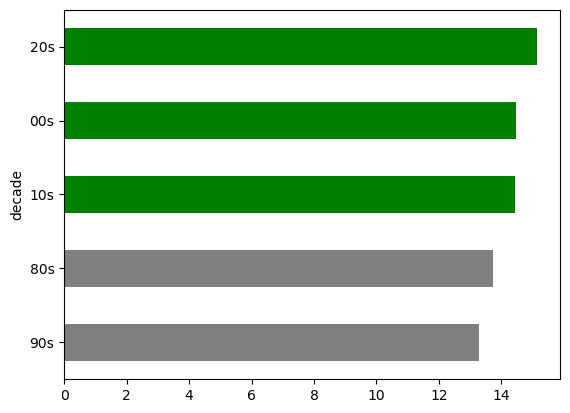

In [112]:
# study rainy_days by decade
merged_df.groupby('decade')['rainy_days'].mean().sort_values(ascending=True).plot.barh(color=['grey','grey','green','green','green'])

**Observations**:
- Dec, Jan and Feb has the highest amount of total rainfall during the months across the years
- If we group by season, Northeast monsoon is the period with most amount of rainfall within the month, followed by the Oct-Nov inter monsoon season. This means the second half of the year typically has a higher rainfall
- The recent three decades (2000-now) has the most number of rainy days, with the current decade having the highest number of rainy days

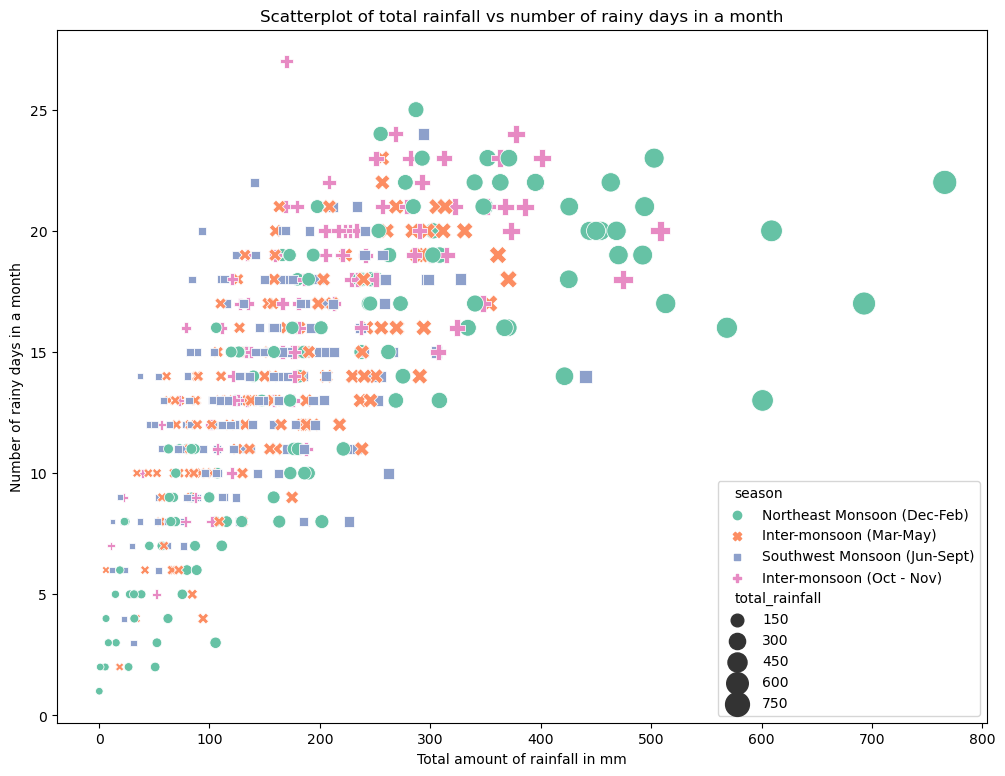

In [39]:
# find out how the number of rainy days and total rainfall correlates by season
plt.figure(figsize=(12,9))
sns.scatterplot(merged_df, x='total_rainfall',y='rainy_days', size='total_rainfall', sizes=(30, 300), hue='season', style='season', palette='Set2')
plt.xlabel('Total amount of rainfall in mm')
plt.ylabel('Number of rainy days in a month')
plt.title('Scatterplot of total rainfall vs number of rainy days in a month')
plt.show()

<Figure size 1200x1200 with 0 Axes>

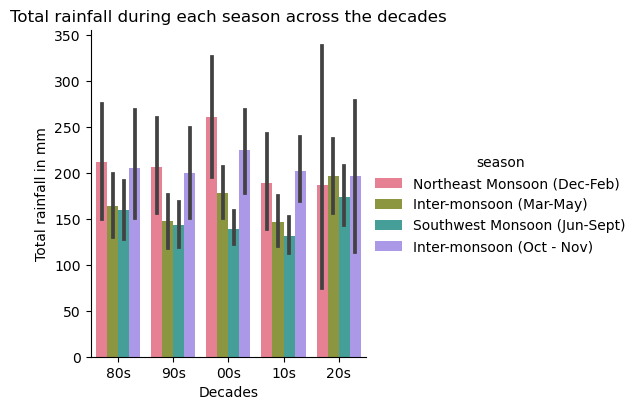

In [561]:
# does this pattern change across the years?
plt.figure(figsize=(12,12))
sns.catplot(data=merged_df, x='decade', y='total_rainfall', hue='season', palette='husl',kind='bar', height=4, aspect=1)
plt.ylabel('Total rainfall in mm')
plt.xlabel('Decades')
plt.title('Total rainfall during each season across the decades')
plt.show()

Observation: 
- There is a strong correlation between total amount of rainfall and number of rainy days. 
- There are some extreme cases where there is more amount of rainfall, mostly occurring during the Northeast Monsoon season. 
- This patten is consistent across decades except for the 10s, when inter-monsoon season has a higher total rainfall than Northeast Monsoon season. 
    - due to data that is present, the pattern observed during 20s may not be representative as data for Sept - Dec 2022 is missing

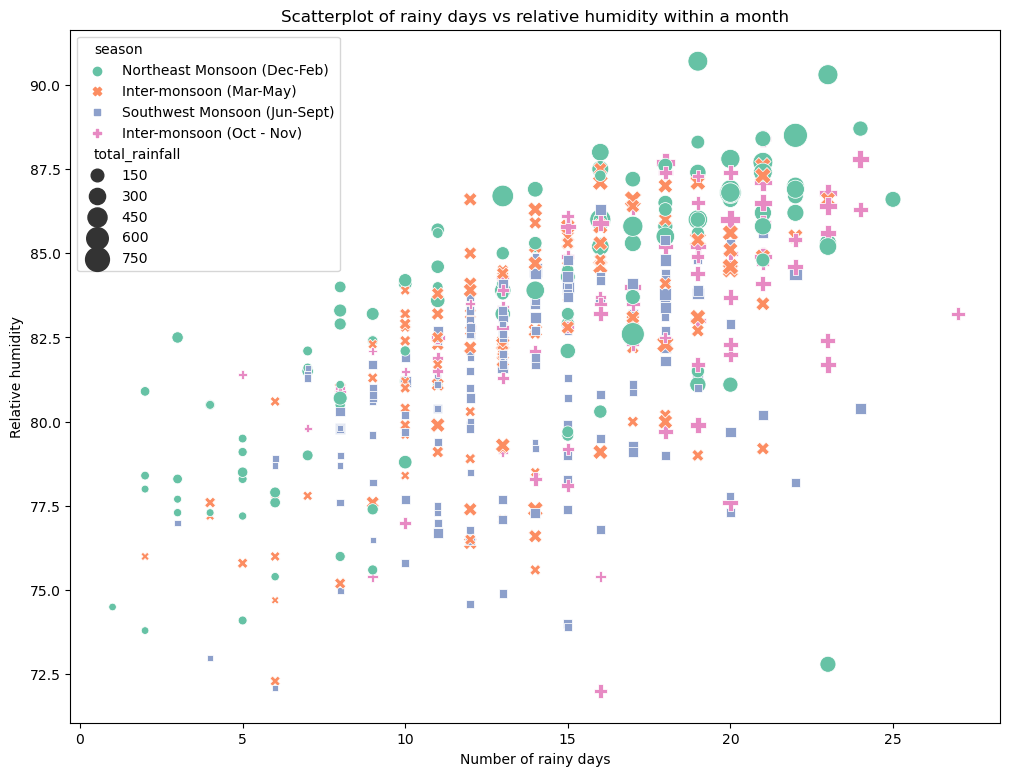

In [41]:
# Does more rainy days means there is a higher humidity
plt.figure(figsize=(12,9))
sns.scatterplot(merged_df, x='rainy_days',y='mean_rh', size='total_rainfall', sizes=(30, 300), hue='season', style='season', palette='Set2')
plt.xlabel('Number of rainy days')
plt.ylabel('Relative humidity')
plt.title('Scatterplot of rainy days vs relative humidity within a month')
plt.show()

<Figure size 1200x1200 with 0 Axes>

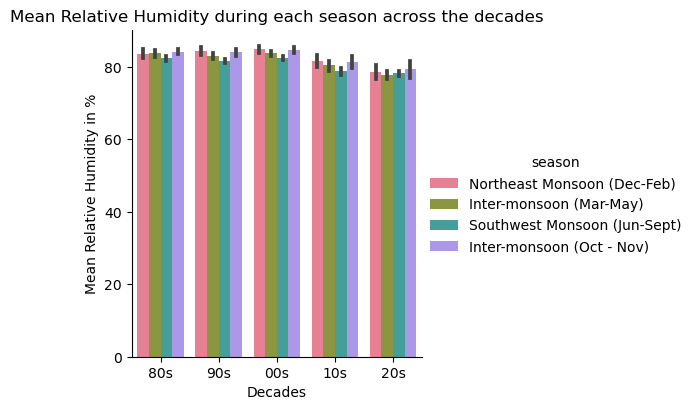

<Figure size 1200x1200 with 0 Axes>

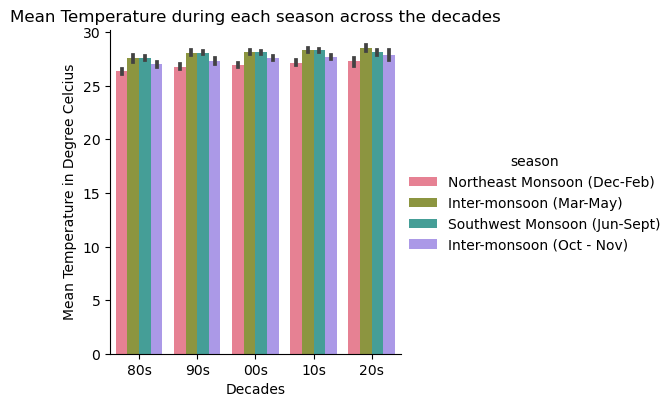

In [36]:
# does relative humidity change across the years?
plt.figure(figsize=(12,12))
sns.catplot(data=merged_df, x='decade', y='mean_rh', hue='season', palette='husl',kind='bar', height=4, aspect=1)
plt.ylabel('Mean Relative Humidity in %')
plt.xlabel('Decades')
plt.title('Mean Relative Humidity during each season across the decades')
plt.show()

plt.figure(figsize=(12,12))
sns.catplot(data=merged_df, x='decade', y='mean_temp', hue='season', palette='husl',kind='bar', height=4, aspect=1)
plt.ylabel('Mean Temperature in Degree Celcius')
plt.xlabel('Decades')
plt.title('Mean Temperature during each season across the decades')
plt.show()

**Observations**: 
- The scatter plot shows that points across all seasons appears to spread across. No matter which season, more rainy days means higher relative humidity. 
- mean temperature and mean relative humidity appears to be pretty stable across the decades. 

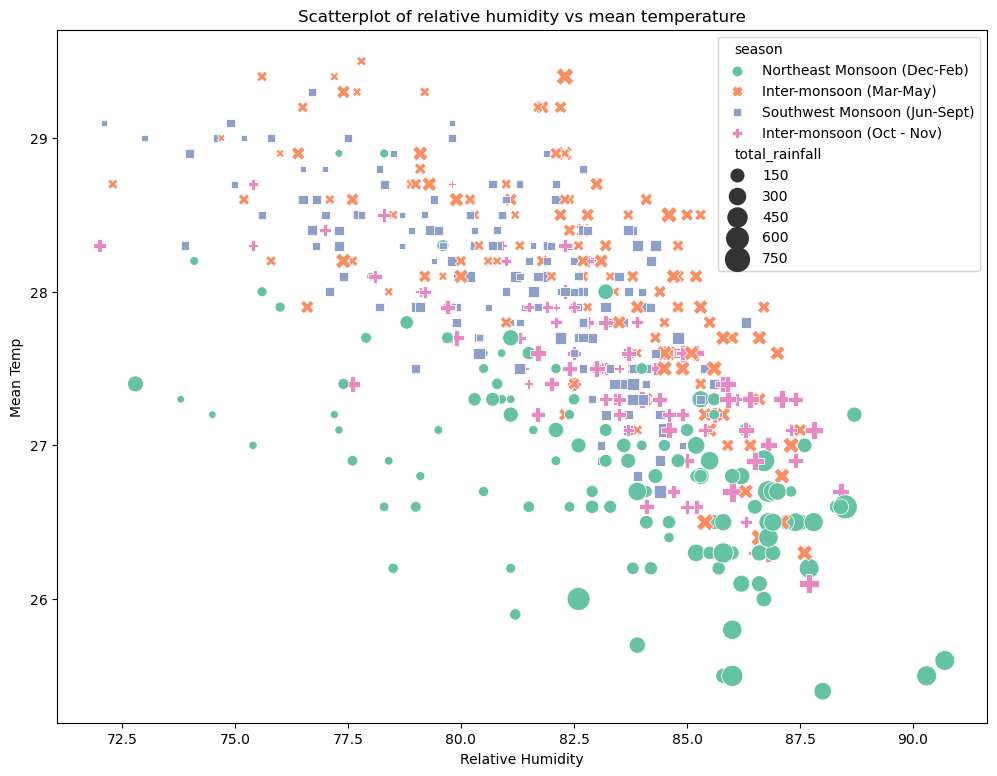

In [564]:
# study the relationship between humidity and temp
plt.figure(figsize=(12,9))
sns.scatterplot(merged_df, x='mean_rh',y='mean_temp', size='total_rainfall', sizes=(30, 300), hue='season', style='season', palette='Set2')
plt.xlabel('Relative Humidity')
plt.ylabel('Mean Temp')
plt.title('Scatterplot of relative humidity vs mean temperature')
plt.show()

**Observations** : The months with higher rainfalls (Northeast Monsoon) typically has higher relative humidity and lower mean temperature

#### Further analysis with Covid-19 flu
1. Find out correlations between variables
2. Plot a line chart to observe covid-19 trends, focusing on local cases in order
3. Find out if the cases coincides with monsoon seasons
4. Find out cases by months, aggregated over three years
5. Plot regplots for local cases vs relative humidity, temperature, and number of rainy days

/var/folders/t4/n89gfp4s10b4j476kq4xh2p00000gn/T/ipykernel_9031/3132911928.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_flu_df.corr()


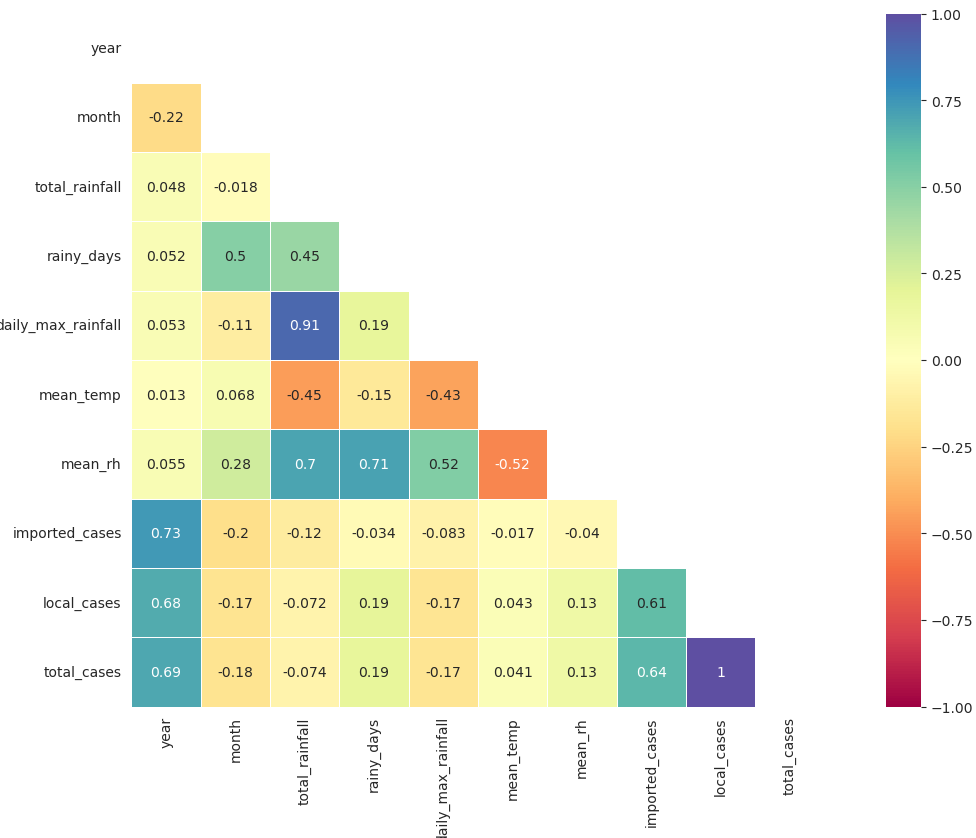

In [43]:
# find out the correlation of the variables
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = merged_flu_df.corr()

# Set up mask to be "True" in the upper triangle. this is to reduce the number of 'squares' seen in the correlation heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap='Spectral')

**Observations**:
- local cases and total cases has a 1:1 correlation. This means most of the reported cases are local infections. 
    - We can use local infections for analysis towards our problem statement
- there is some extend of positive corrrelation for three variables (number of rainy days, mean temperature, and mean relative humidity) with the number of local cases reported.

In [59]:
# Singapore begins efforts of
open_date = merged_flu_df.loc[merged_flu_df['date'] == '2021-11-01']['date']

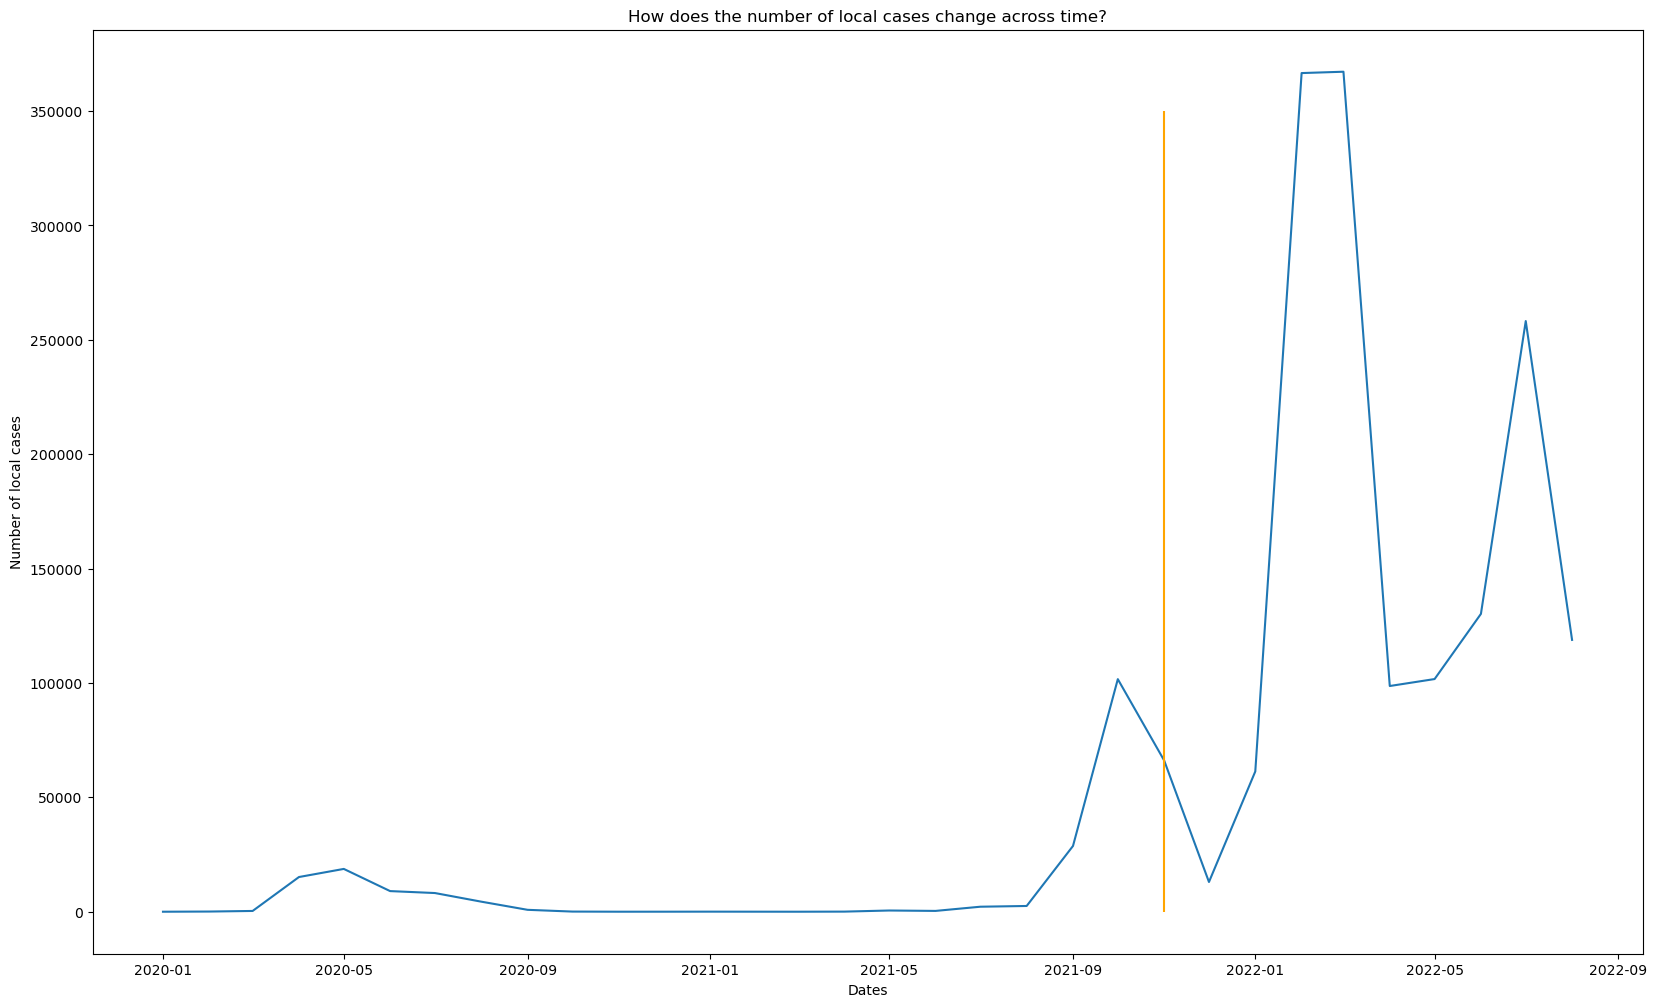

In [61]:
# plot date against sum of local cases
plt.figure(figsize = (20,12))
sns.lineplot(x = "date", y = "local_cases", data = merged_flu_df)
plt.xlabel('Dates')
plt.ylabel('Number of local cases')
plt.title('How does the number of local cases change across time?')


plt.vlines(x=open_date, ymin=0, ymax=350000, colors='orange')

**Observations**: Various measures had been put in place to contain covid-19 cases during the earlier periods (2020 - early 2021). The government started efforts of gradual opening up during November 2021. We would need to find out more about rainfall's effects in the following analysis.

<Figure size 1600x1200 with 0 Axes>

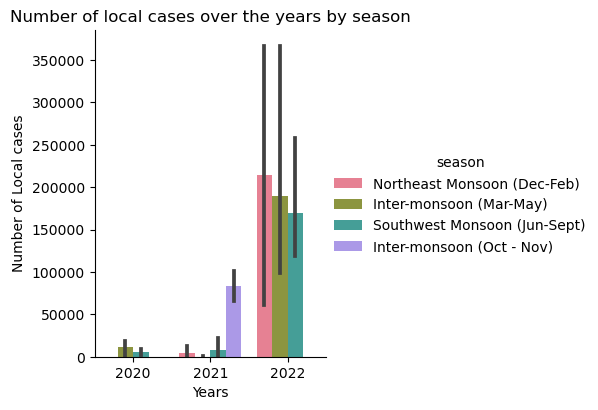

In [46]:
# number of local cases by season across the years
plt.figure(figsize=(16,12))
sns.catplot(data=merged_flu_df, x='year', y='local_cases', hue='season', kind='bar', height=4, aspect=1, palette='husl')
plt.ylabel('Number of Local cases')
plt.xlabel('Years')
plt.title('Number of local cases by season over the years')

plt.show()

Text(0.5, 1.0, 'Number of local cases against months (aggregated by years)')

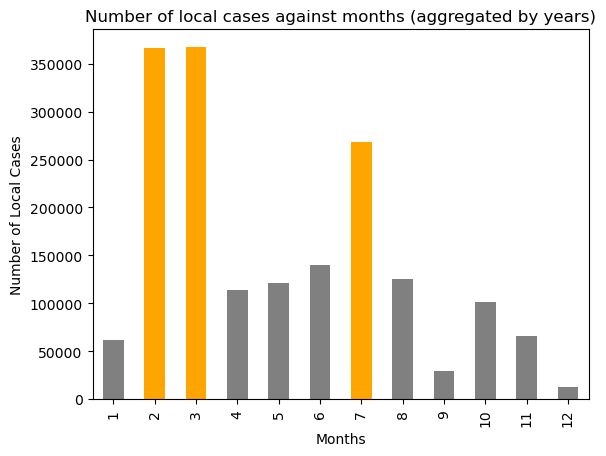

In [107]:
# find out the pattern by months across the three years in pandemic
merged_flu_df.groupby(['month'])['local_cases'].sum().plot(kind='bar', color=['grey','orange','orange','grey','grey','grey','orange','grey','grey','grey','grey','grey'])
plt.ylabel('Number of Local Cases')
plt.xlabel('Months')
plt.title('Number of local cases against months (aggregated by years)')

**Observation**: 
- It does looks like the rainy seasons (Northeast Monsoon) has a higher number of local Covid-19 cases
- The highest amount of cases recorded are during the months of Feb and March
  * this might mean that the cases happens after the rainy seasons
  * also, the data do not have 2022's data from Sept onwards. It is hard to make a conclusion 

<AxesSubplot: xlabel='rainy_days', ylabel='local_cases'>

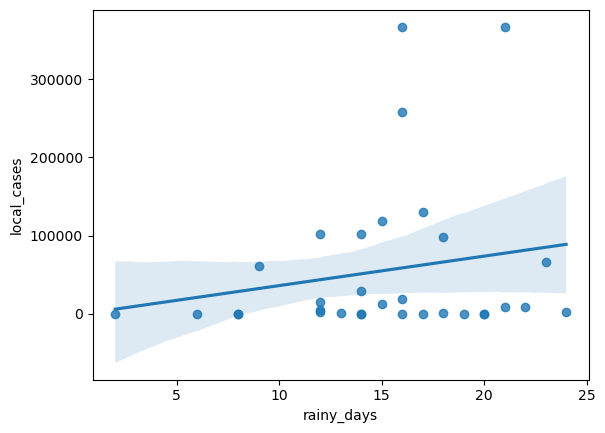

In [108]:
# plot line graph of local cases against number of rainy days
sns.regplot(x = "rainy_days", y = "local_cases", data = merged_flu_df)

<AxesSubplot: xlabel='mean_rh', ylabel='local_cases'>

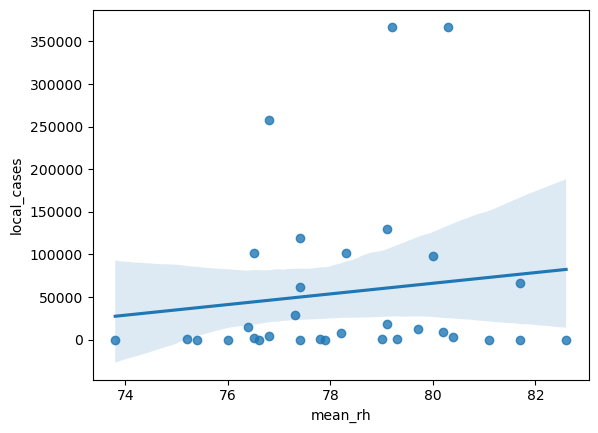

In [109]:
# plot line graph of local cases against humidity
sns.regplot(x = "mean_rh", y = "local_cases", data = merged_flu_df)

<AxesSubplot: xlabel='mean_temp', ylabel='local_cases'>

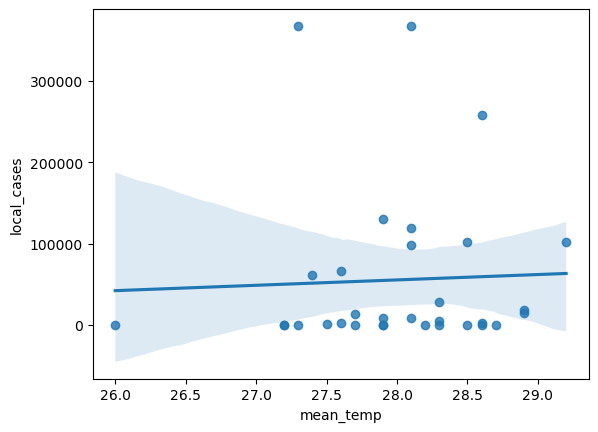

In [110]:
# plot line graph of local cases against temperature
sns.regplot(x = "mean_temp", y = "local_cases", data = merged_flu_df)

**Observations**:
- There is a slight positive correlation between number of rainy days and number of local cases.
- Also, mean temperature and mean relative humidity also has some, albeit lower, correlations to the number of local cases

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**Conclusion:** Singapore has a pretty stable weather conditions, with a gradual increase of total rainfall per month in the recent decades. The number of rainy days is roughly 14 days, and the temperature is roughly 27 degree celcius. The Northeast Monsoon season (Dec-Feb) often has the highest amount of rainfall and maximum amount of rainfall. Singapore also has a pretty stable relative humidity as well.

**Key takeaways / recommendations:** 
1. Are the cases always happening during the rainy seasons? 
    * From the analysis, it is not that conclusive as the data is not so complete
2. Flu cases are might be more affected by other factors, such as the country's policies of opening up, personal lifestyle and hygiene, as well as immunity. Also, most of the festive seasons important to Singaporeans such as Christmas, New Year, and Chinese New Year happens during this period.
    * There is a potential for deeper analysis with the suitable data, i.e.: immunity rate in Singapore
    * Also, there might be scenarios of under-reported cases after the government's opening up policies, where individuals do not have to declare their status if they are not tested positive in a medical establishment
3. Although the positive correlation is minimal, we should take the necessary precautions as we live with covid.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!